In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import datetime
from itertools import islice

In [2]:
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

In [3]:
def parse_timestamp(el):
    b = datetime.datetime.strptime(el, fmt)
    return b

In [4]:
def create_date_col(df_m):
    date_lst = []
    for index, row in df_m.iterrows():
        day = str(df_m['ride_begin'][index].day)
        month = str(df_m['ride_begin'][index].month)
        year = str(df_m['ride_begin'][index].year)
        date_text = year + '-' + month + '-' + day
        date_lst.append(date_text)
    return date_lst

In [5]:
fmt = '%Y-%m-%d %H:%M:%S'

In [6]:
url = "/bigdata/jelicicna/mobility_data_2021/anlysis_data_nextbike_2021-07.csv"
df = pd.read_csv(url, sep=';', low_memory=False)

In [7]:
url2 = "/bigdata/jelicicna/clustering_datasets/locations_for_clustering_2021-07.csv"
df_locations = pd.read_csv(url2, sep=';', low_memory=False)

In [8]:
df.drop('old_index', axis=1, inplace=True)

In [9]:
df['ride_begin'] = df['ride_begin'].map(parse_timestamp)
df['ride_end'] = df['ride_end'].map(parse_timestamp)

In [10]:
#separate data for clustering
x = df_locations.iloc[:,2:4]

In [11]:
x.head()

,lat,lng
0,50.9373,6.8990
1,50.9232,6.9534
2,50.9620,6.9042
3,50.9266,7.0112
4,50.9040,6.9639


In [12]:
X = x.to_numpy()

## Agglomerative clustering

In [13]:
# A method for generating dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [14]:
# instantiate Agglomerative Clustering instance
clustering_model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [15]:
# call fit method with array of sample coordinates passed as a parameter
categories = clustering_model.fit(X)

In [16]:
categories.labels_

array([91035, 53287, 72009, ...,     2,     1,     0])

In [17]:
clustering_model.children_

array([[     0,   6205],
       [ 50256,  58966],
       [ 60306,  71283],
       ...,
       [182061, 182062],
       [182067, 182068],
       [182065, 182069]])

In [18]:
clustering_model.distances_.max()

9.529046786164136

In [19]:
clustering_model.distances_.min()

9.999999999621423e-05

In [20]:
# instantiate Agglomerative Clustering instance
clustering_model = AgglomerativeClustering(distance_threshold=0.3, n_clusters=None)

# call fit method with array of sample coordinates passed as a parameter
categories = clustering_model.fit(X)

categories.labels_

array([19, 38,  8, ..., 11, 22, 51])

In [21]:
df_locations['cluster'] = categories.labels_

In [22]:
#plot dendrogram to visualize clusters
#plot_dendrogram(categories)

In [23]:
# instantiate Agglomerative Clustering instance
clustering_model2 = AgglomerativeClustering(distance_threshold=0.2, n_clusters=None)

# call fit method with array of sample coordinates passed as a parameter
categories2 = clustering_model2.fit(X)

categories2.labels_

array([ 0, 38, 68, ..., 12, 73, 25])

In [24]:
df_locations['cluster2'] = categories2.labels_

In [25]:
len(df_locations['cluster'].value_counts())

52

In [26]:
len(df_locations['cluster2'].value_counts())

76

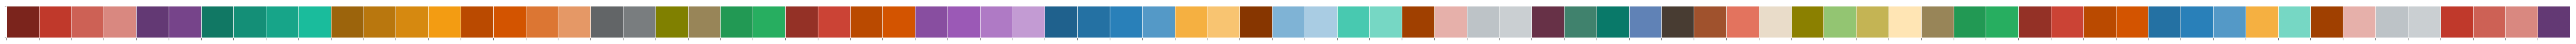

In [36]:
customPalette = ['#7b241c', '#c0392b', '#cd6155', '#d98880', '#633974', '#76448a',
                 '#117864', '#148f77', '#17a589', '#1abc9c',
                 '#9c640c', '#b9770e', '#d68910', '#f39c12',
                 '#ba4a00', '#d35400', '#dc7633', '#e59866', '#626567', '#797d7f',
                 '#808000', '#988558', '#229954', '#27ae60', '#943126', '#cb4335', '#ba4a00', '#d35400',
                 '#884ea0', '#9b59b6', '#af7ac5', '#c39bd3',
                 '#1f618d', '#2471a3', '#2980b9', '#5499c7', '#f5b041', '#f8c471', '#873600','#7fb3d5', '#a9cce3',
                 '#48c9b0', '#76d7c4', '#a04000', '#e6b0aa', '#bdc3c7', '#cacfd2',
                 '#673147', '#40826D', '#097969', '#6082B6', '#483C32', '#A0522D',
                 '#E3735E', '#E9DCC9', '#8B8000', '#93C572', '#C4B454', '#FFE5B4', '#988558', '#229954', '#27ae60',
                 '#943126', '#cb4335', '#ba4a00', '#d35400', '#2471a3', '#2980b9', '#5499c7', '#f5b041', '#76d7c4',
                 '#a04000', '#e6b0aa', '#bdc3c7', '#cacfd2', '#c0392b', '#cd6155', '#d98880', '#633974']
sns.set_palette(customPalette)
sns.palplot(customPalette)

In [28]:
labels = set(df_locations['cluster'].to_list())
labels2 = set(df_locations['cluster2'].to_list())

Text(0, 0.5, 'Latitude')

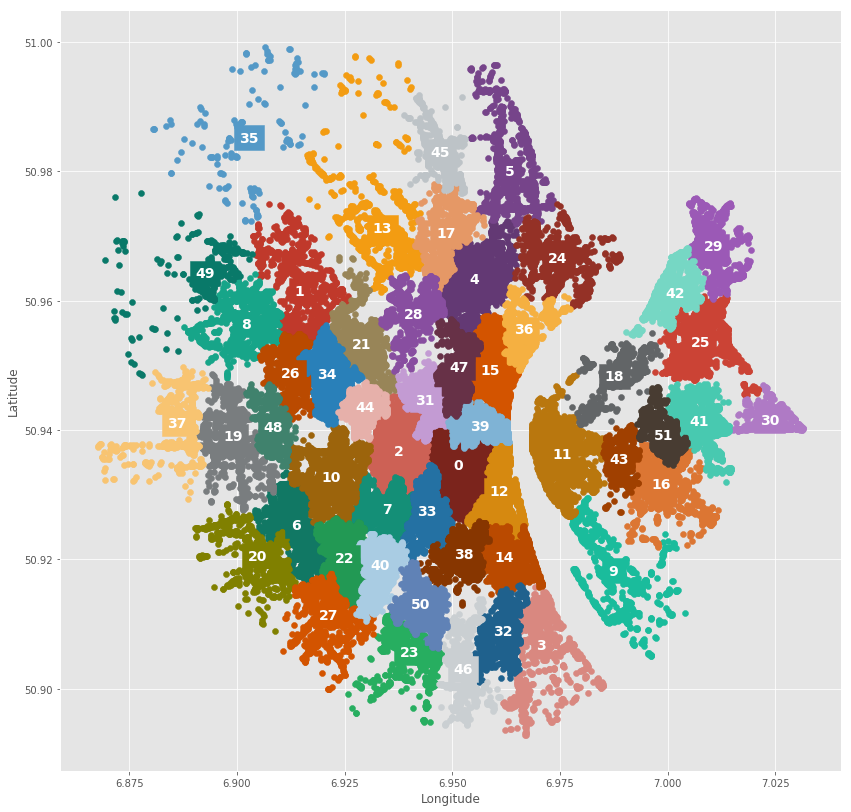

In [29]:
#create a new figure
plt.figure(figsize=(14,14))

#loop through labels and plot each cluster
for l in labels:

    #add data points 
    plt.scatter(x=df_locations.loc[df_locations['cluster']==l, 'lng'], 
                y=df_locations.loc[df_locations['cluster']==l, 'lat'], 
                color=customPalette[l], 
                alpha=1)
    
    #add label
    plt.annotate(l, 
                 df_locations.loc[df_locations['cluster']==l,['lng','lat']].mean(),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=14, weight='bold',
                 color='white',
                 backgroundcolor=customPalette[l]) 
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [38]:
df_locations['cluster'].value_counts()

2     5738
0     3555
11    3265
4     3149
7     2844
15    2839
34    2798
14    2744
10    2622
22    2619
6     2511
33    2202
12    2180
40    2154
39    2082
41    2061
50    1991
21    1969
8     1899
16    1891
47    1809
26    1769
25    1736
32    1668
31    1615
1     1593
19    1584
27    1513
38    1486
51    1442
24    1426
42    1416
3     1404
28    1382
17    1293
5     1243
23    1235
29    1118
44    1104
9     1082
13    1057
20    1042
48     987
36     924
43     881
37     833
18     776
46     700
30     636
45     619
49     387
35     163
Name: cluster, dtype: int64

Text(0, 0.5, 'Latitude')

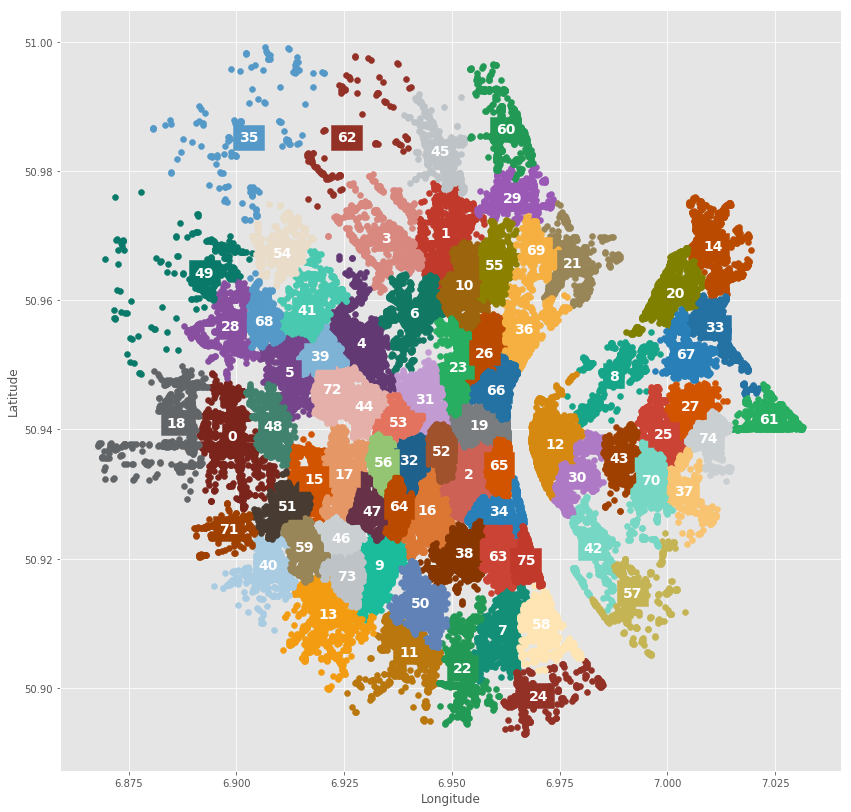

In [37]:
#create a new figure
plt.figure(figsize=(14,14))

#loop through labels and plot each cluster
for l in labels2:

    #add data points 
    plt.scatter(x=df_locations.loc[df_locations['cluster2']==l, 'lng'], 
                y=df_locations.loc[df_locations['cluster2']==l, 'lat'], 
                color=customPalette[l], 
                alpha=1)
    
    #add label
    plt.annotate(l, 
                 df_locations.loc[df_locations['cluster2']==l,['lng','lat']].mean(),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=14, weight='bold',
                 color='white',
                 backgroundcolor=customPalette[l]) 
plt.xlabel('Longitude')
plt.ylabel('Latitude')

## Clustering rides

In [39]:
df.head()

,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,name,available_bikes,calculated_distance
0,50.906013,6.942883,50.925653,6.965592,2021-07-02 20:21:01,2021-07-02 20:46:01,25.0,2703.0,48597121,48662506,967.0,BIKE 220700,1867,11500.0
1,50.925653,6.965592,50.955982,6.973292,2021-07-02 23:59:02,2021-07-03 11:03:01,664.0,3416.0,48662506,48699736,193.0,BIKE 220700,1939,279000.0
2,50.955982,6.973292,50.921187,6.958677,2021-07-04 02:25:03,2021-07-04 02:45:02,20.0,4004.0,48699736,48771647,922.0,BIKE 220700,1951,9000.0
3,50.921516,6.958568,50.907453,6.928838,2021-07-04 17:48:02,2021-07-04 18:02:02,14.0,2606.0,48784895,48812591,404.0,BIKE 220700,1945,6500.0
4,50.907453,6.928838,50.917138,6.906824,2021-07-05 00:44:01,2021-07-05 00:54:01,10.0,1883.0,48812591,48839186,402.0,BIKE 220700,1971,6500.0
